In [15]:
import pandas as pd
import numpy as np
import os
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
%matplotlib inline

# https://dozee.herokuapp.com/

#### Reading the CSV file

In [94]:
df= pd.read_csv("csv_{}.csv".format(1))

In [95]:
df.head()

,TimeStamp,HeartRate,BreathRate
0,1599419501,92.38,10.30
1,1599419531,92.38,16.97
2,1599419561,73.50,16.97
3,1599419591,76.38,16.97
4,1599419621,58.93,16.97


#### Creating group column based on seconds

In [96]:
count=0
def group(x):
    global count
    count+=30
    return count
df["group"] = df["TimeStamp"].apply(group)


In [97]:
df.head()

,TimeStamp,HeartRate,BreathRate,group
0,1599419501,92.38,10.30,30
1,1599419531,92.38,16.97,60
2,1599419561,73.50,16.97,90
3,1599419591,76.38,16.97,120
4,1599419621,58.93,16.97,150


#### Visualizing the data before outlier removal

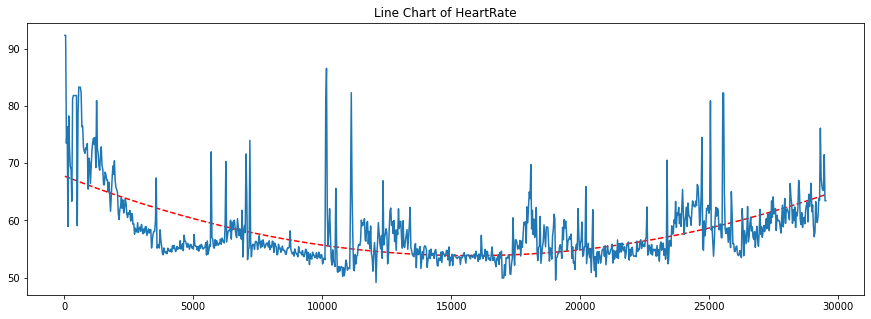

Trend line equation :             2
5.632e-08 x - 0.001773 x + 67.78


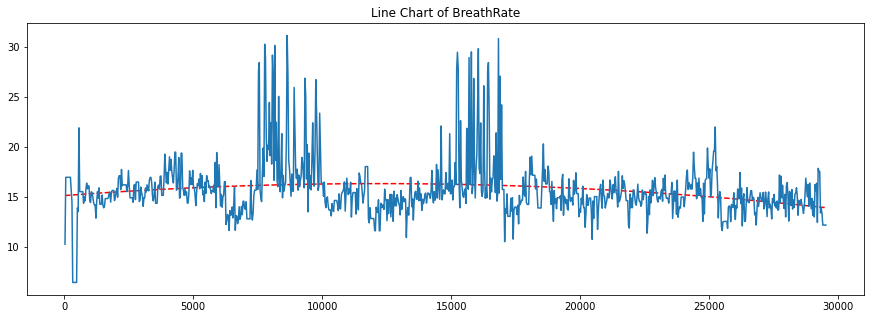

Trend line equation :              2
-8.013e-09 x + 0.0001957 x + 15.15


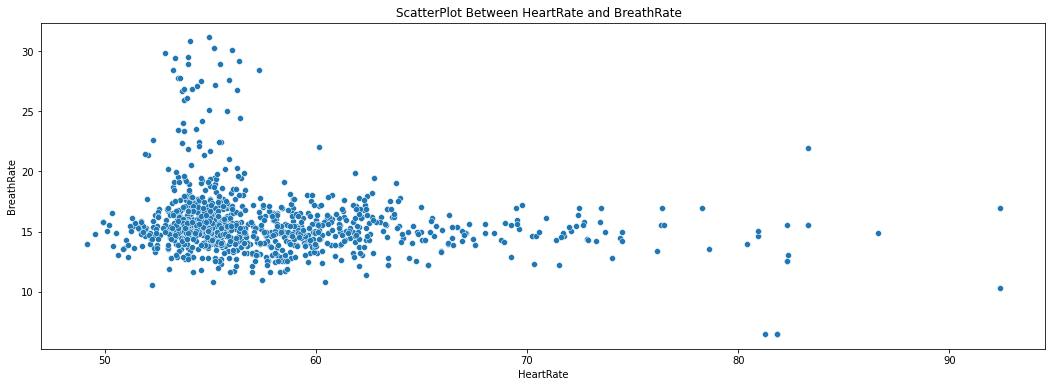

In [98]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array(df["group"])
plt.figure(figsize=(15, 5))
plt.title("Line Chart of HeartRate")
z = np.polyfit(X, df["HeartRate"], 2)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.plot(X, df["HeartRate"])
plt.savefig('1.png')
plt.show()

print("Trend line equation : ",p)


X = np.array(df["group"])
plt.figure(figsize=(15, 5))
plt.title("Line Chart of BreathRate")
z = np.polyfit(X, df["BreathRate"], 2)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.plot(X, df["BreathRate"])
plt.savefig('11.png')
plt.show()
print("Trend line equation : ",p)


plt.figure(figsize=(18,6))
plt.title("ScatterPlot Between HeartRate and BreathRate  ")
sns.scatterplot(df["HeartRate"],df["BreathRate"])
plt.savefig('111.png')
plt.show()

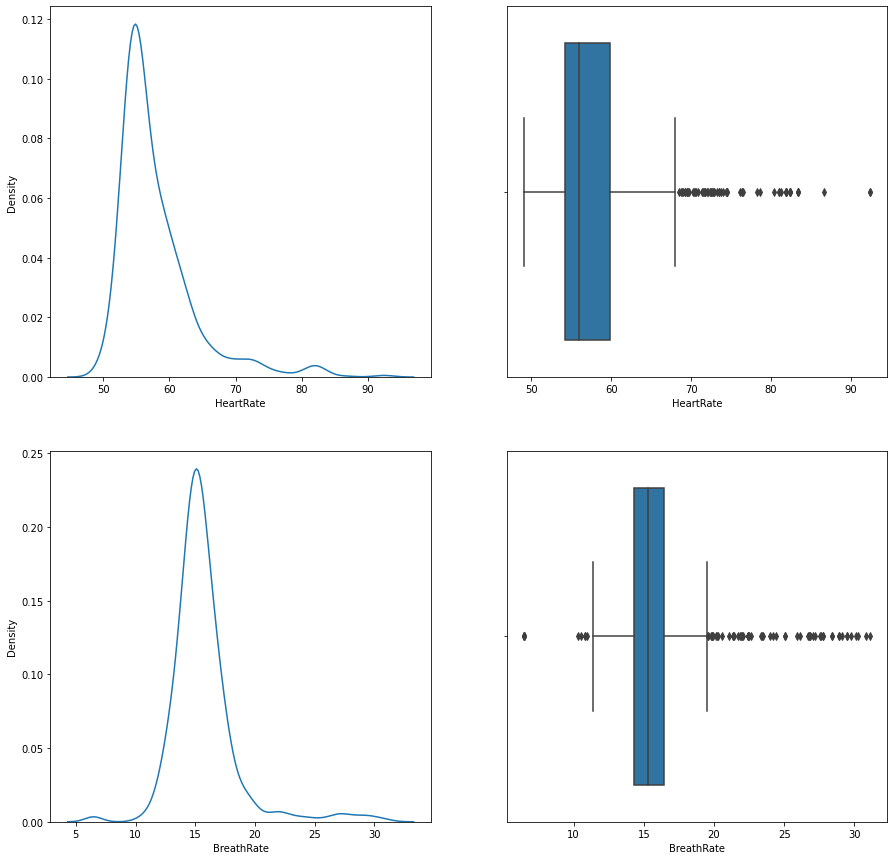

In [43]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.kdeplot(df["HeartRate"],ax=axs[0,0])
sns.boxplot(df["HeartRate"],ax=axs[0,1])
sns.kdeplot(df["BreathRate"],ax=axs[1,0])
sns.boxplot(df["BreathRate"],ax=axs[1,1])

plt.show()

#### Creating Windows each of 1 hour

In [24]:
def split_dataframe(df, chunk_size = 120): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks

In [25]:
split_dataframe(df, chunk_size = 120)
windows = split_dataframe(df, chunk_size=120)

#### Visualizing each Window

<Figure size 720x720 with 0 Axes>

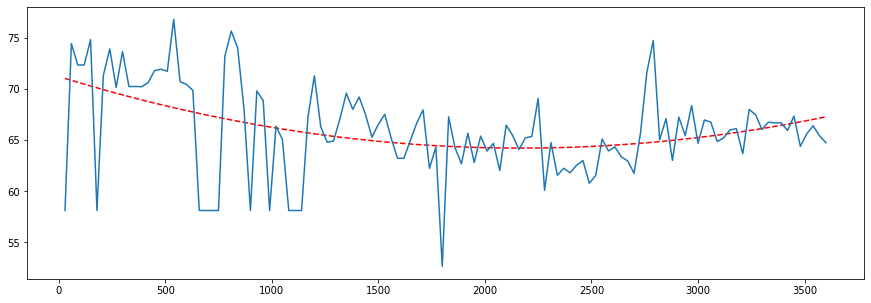

<Figure size 720x720 with 0 Axes>

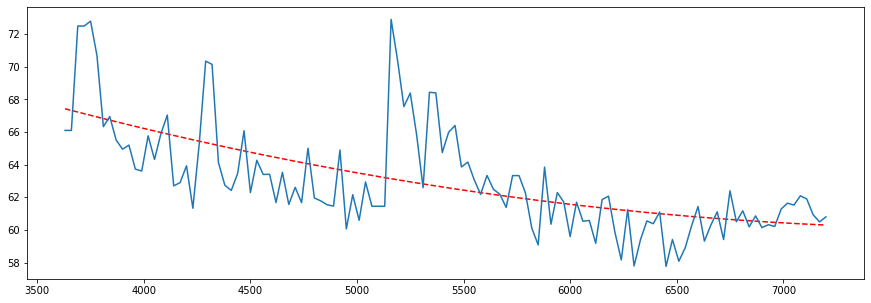

<Figure size 720x720 with 0 Axes>

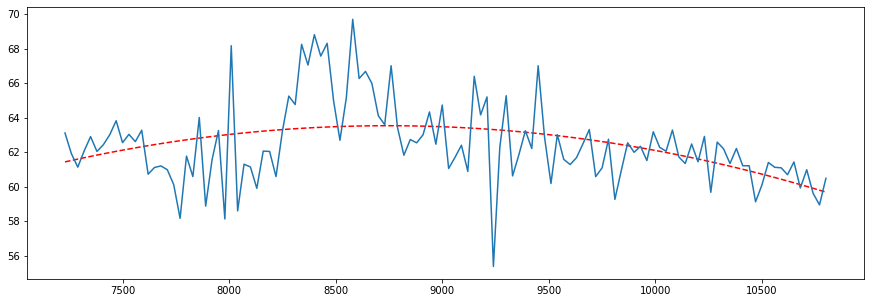

<Figure size 720x720 with 0 Axes>

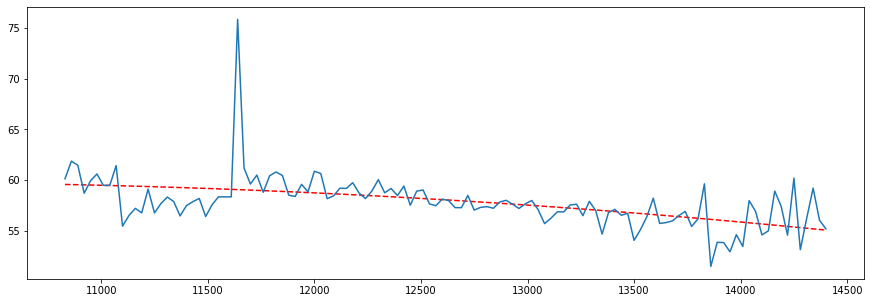

<Figure size 720x720 with 0 Axes>

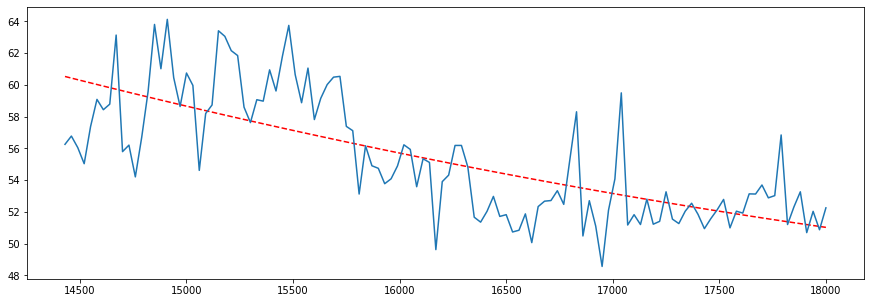

<Figure size 720x720 with 0 Axes>

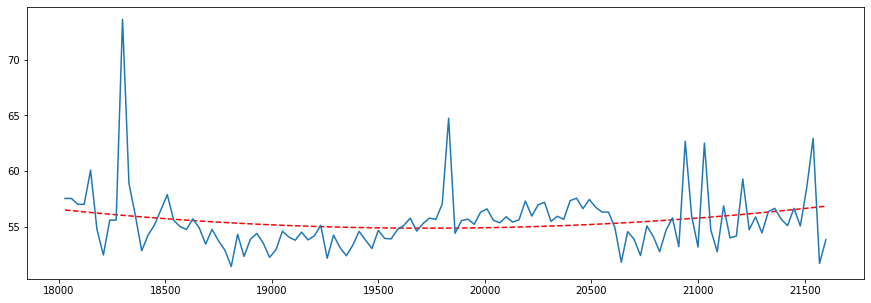

<Figure size 720x720 with 0 Axes>

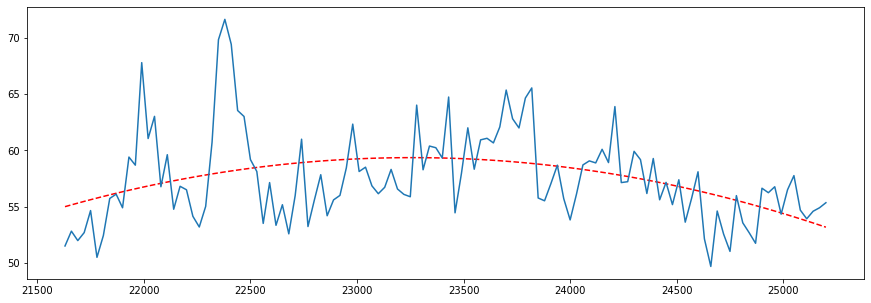

<Figure size 720x720 with 0 Axes>

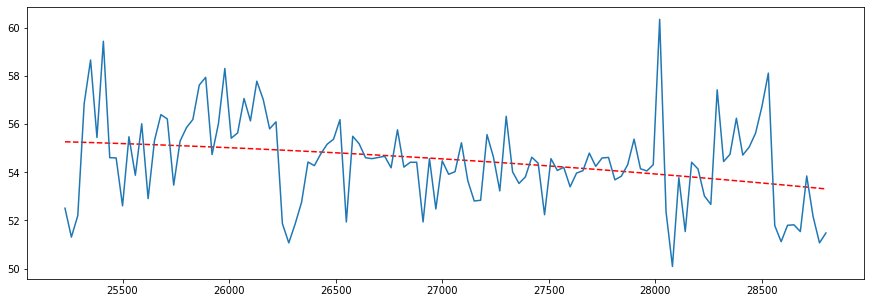

<Figure size 720x720 with 0 Axes>

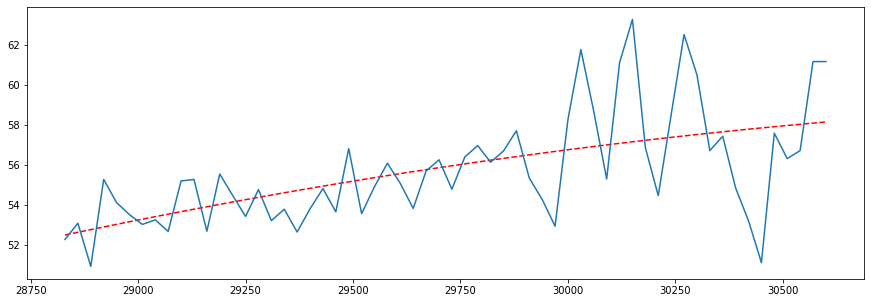

In [110]:
for i in range(0,len(windows)):
    plt.figure(figsize=(10,10))  
    X = np.array(windows[i]["group"])
    plt.figure(figsize=(15, 5))
    z = np.polyfit(X, windows[i]["HeartRate"], 2)
    p = np.poly1d(z)
    plt.plot(X,p(X),"r--")
    plt.plot(X, windows[i]["HeartRate"])
    #X = np.array(windows[i]["group"])
    #plt.figure(figsize=(15, 5))
    #z = np.polyfit(X, windows[i]["BreathRate"], 2)
    #p = np.poly1d(z)
    #plt.plot(X,p(X),"r--")
    #plt.plot(X, windows[i]["BreathRate"])
    q = "w"+str(i)+".png"
    plt.savefig(q)
    plt.show()

    
    
    

#### Identifying outlier using Z score and replacing Outlier with the Median Value

In [29]:
z = np.abs(stats.zscore(df["HeartRate"]))
z1 =np.abs(stats.zscore(df["BreathRate"]))
drop_index=(np.where(z > 3) or np.where(z<-3))
drop_index1=(np.where(z1 > 3) or np.where(z1<-3))
drop_index = list(drop_index)
drop_index1 = list(drop_index1)
drop_index = drop_index[0].tolist()
drop_index1 = drop_index1[0].tolist()
df.loc[drop_index,"HeartRate"] = df["HeartRate"].median()
df.loc[drop_index1,"BreathRate"] = df["BreathRate"].median()

#### Visualizing the data after Outlier Removal

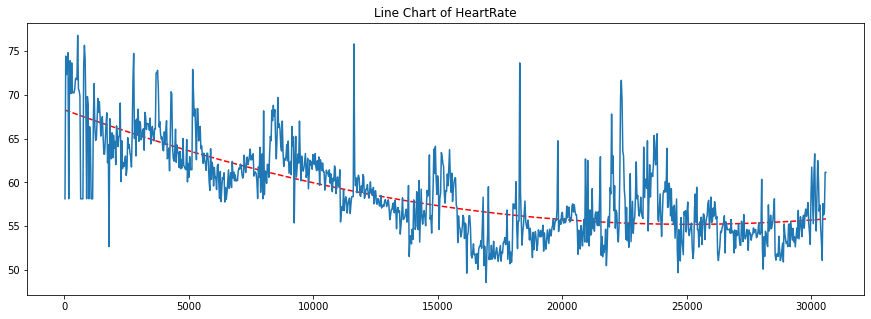

Trend line equation :             2
2.069e-08 x - 0.001041 x + 68.3


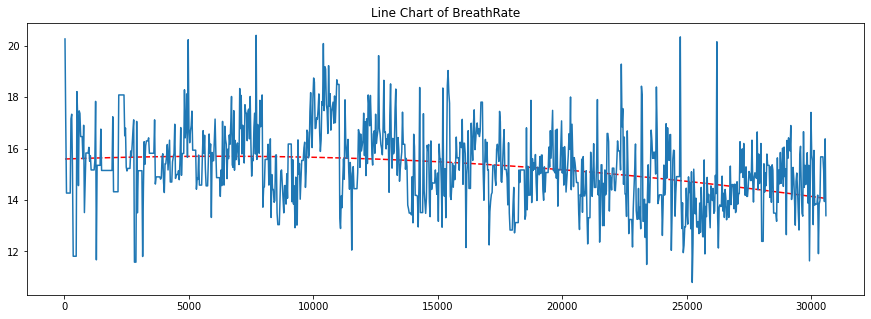

Trend line equation :              2
-2.766e-09 x + 3.449e-05 x + 15.6


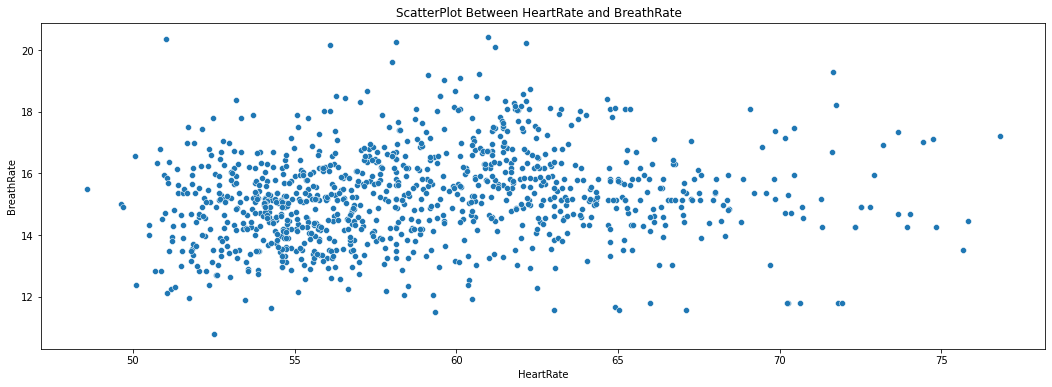

In [30]:
X = np.array(df["group"])
plt.figure(figsize=(15, 5))
plt.title("Line Chart of HeartRate")
z = np.polyfit(X, df["HeartRate"], 2)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.plot(X, df["HeartRate"])
plt.show()
print("Trend line equation : ",p)


X = np.array(df["group"])
plt.figure(figsize=(15, 5))
plt.title("Line Chart of BreathRate")
z = np.polyfit(X, df["BreathRate"], 2)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.plot(X, df["BreathRate"])
plt.show()
print("Trend line equation : ",p)


plt.figure(figsize=(18,6))
plt.title("ScatterPlot Between HeartRate and BreathRate  ")
sns.scatterplot(df["HeartRate"],df["BreathRate"])
plt.show()


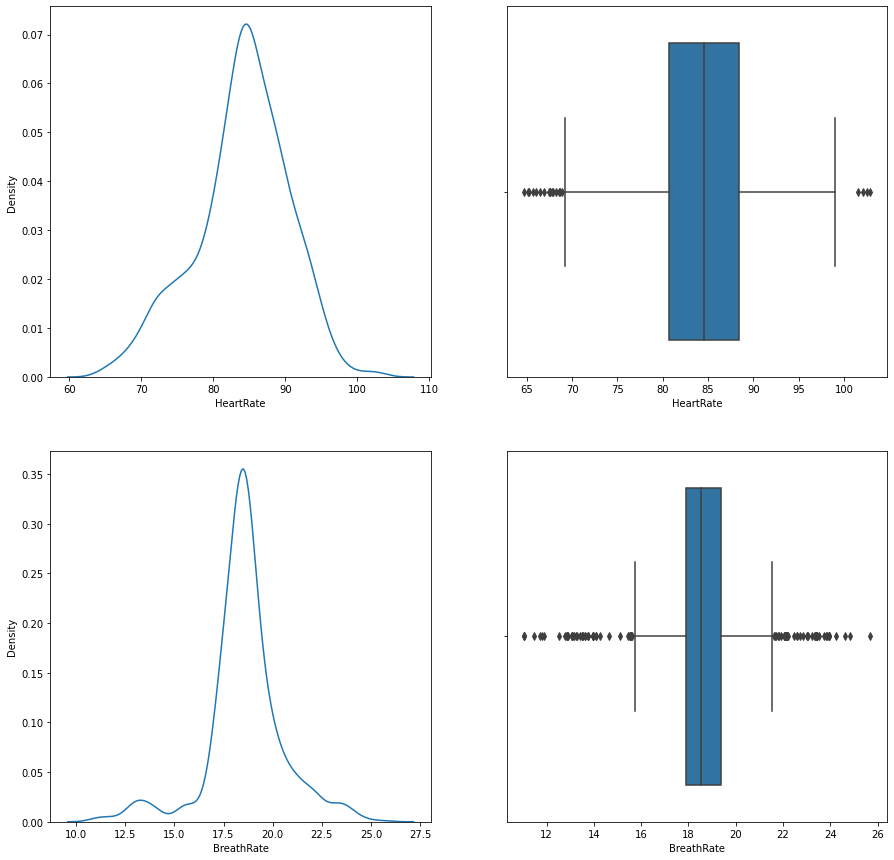

In [2022]:
fig, axs = plt.subplots(2,2,figsize=(15,15))

sns.kdeplot(df["HeartRate"],ax=axs[0,0])
sns.boxplot(df["HeartRate"],ax=axs[0,1])
sns.kdeplot(df["BreathRate"],ax=axs[1,0])
sns.boxplot(df["BreathRate"],ax=axs[1,1])
plt.show()

#### Creating Windows each of 1 hour¶

In [2023]:
windows=split(df,120)

#### Visualizing each Window

<Figure size 720x720 with 0 Axes>

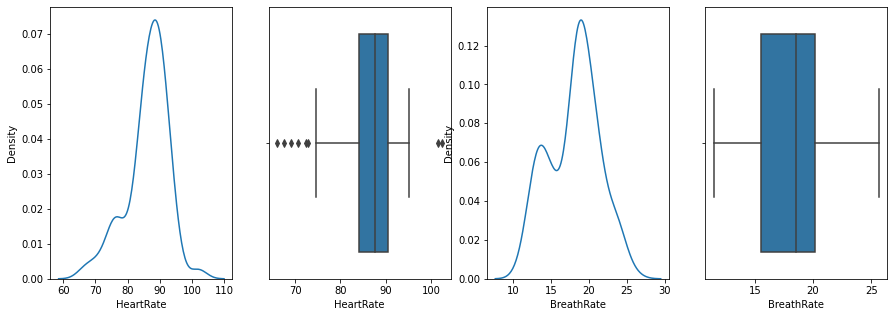

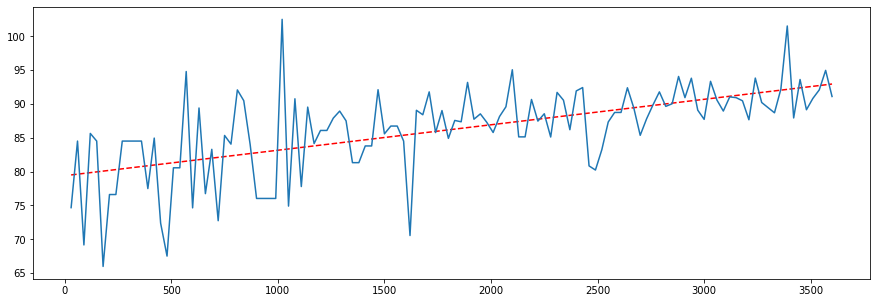

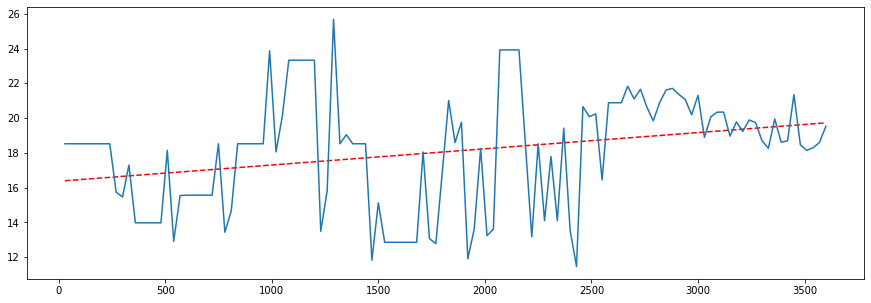

<Figure size 720x720 with 0 Axes>

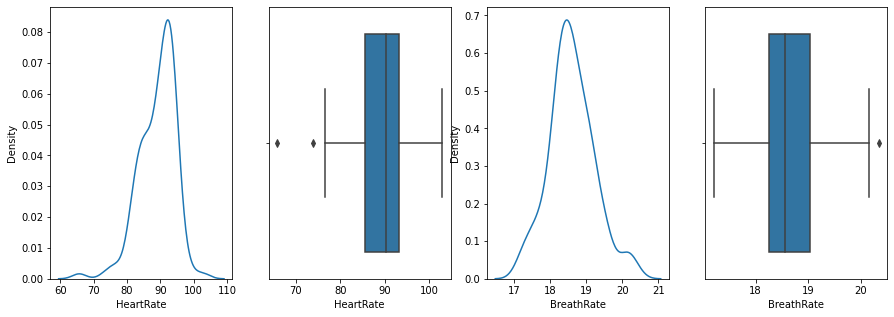

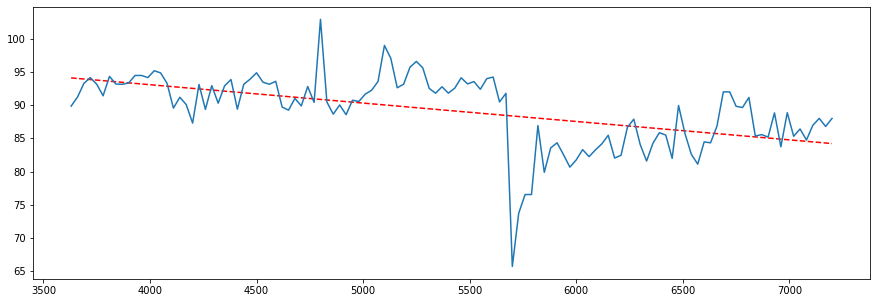

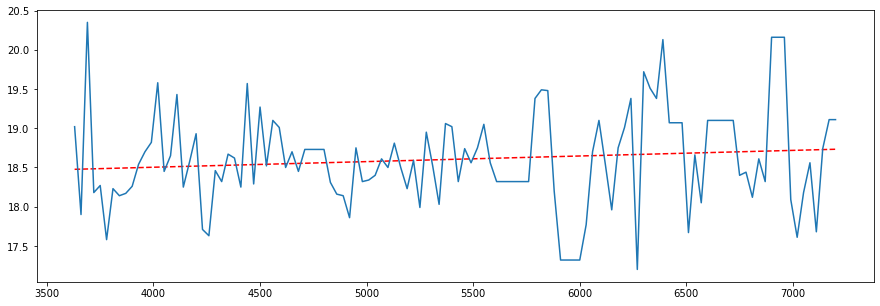

<Figure size 720x720 with 0 Axes>

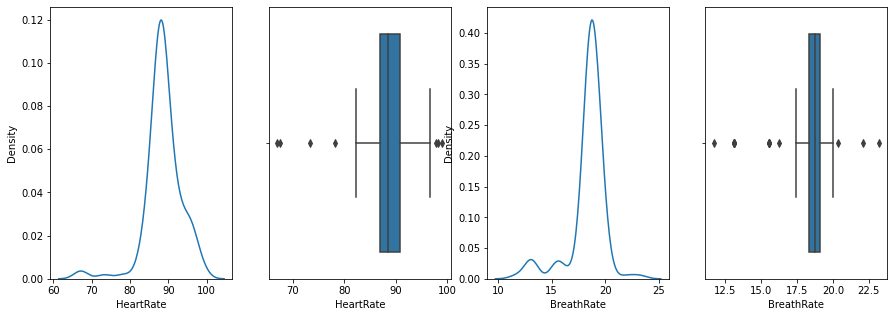

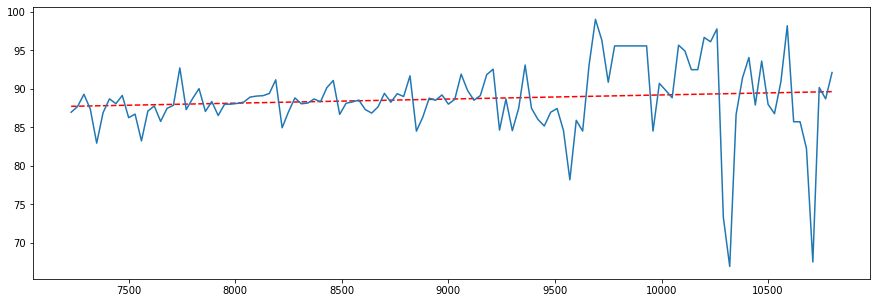

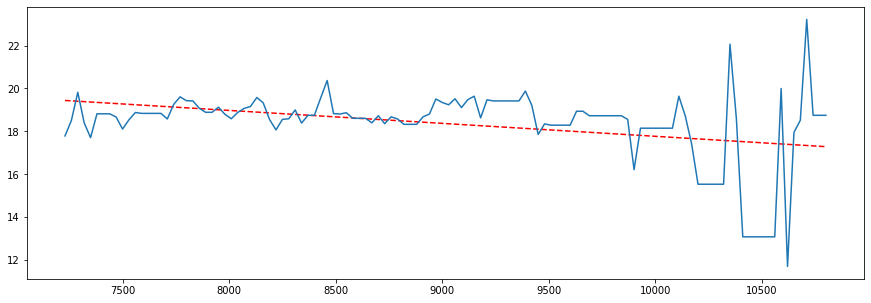

<Figure size 720x720 with 0 Axes>

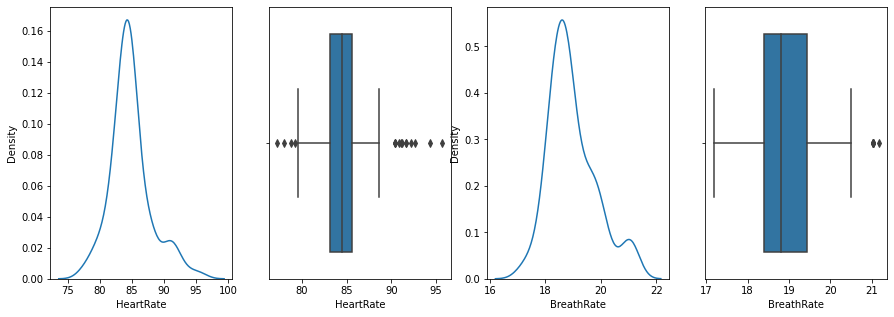

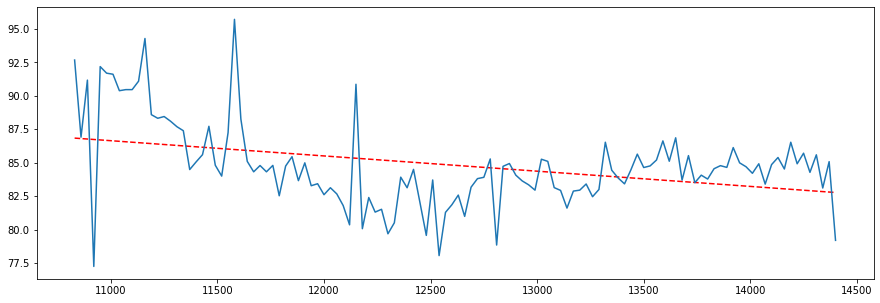

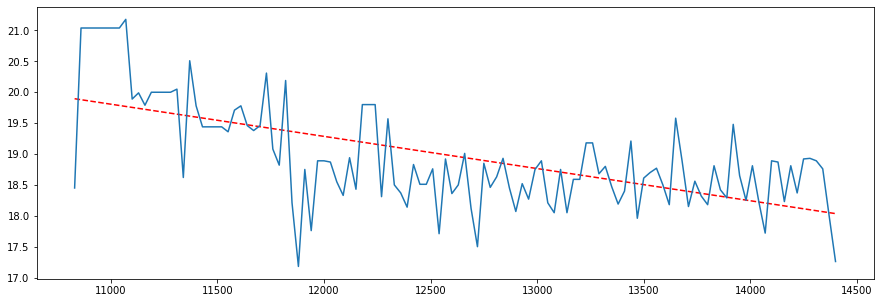

<Figure size 720x720 with 0 Axes>

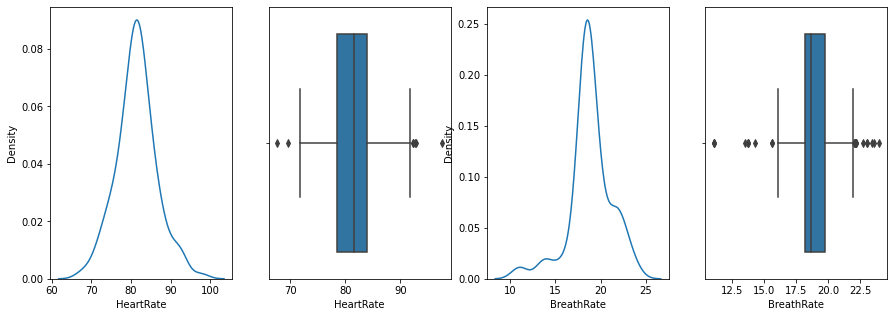

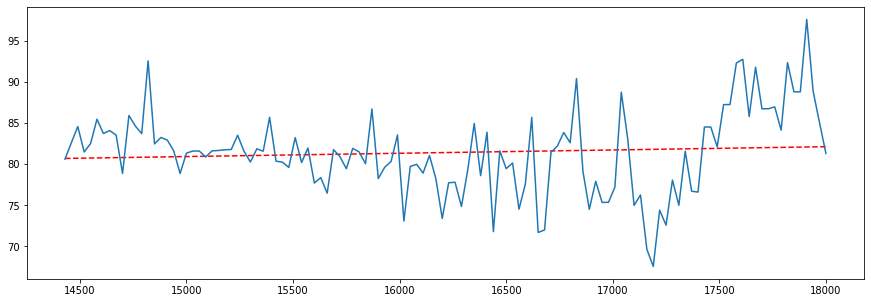

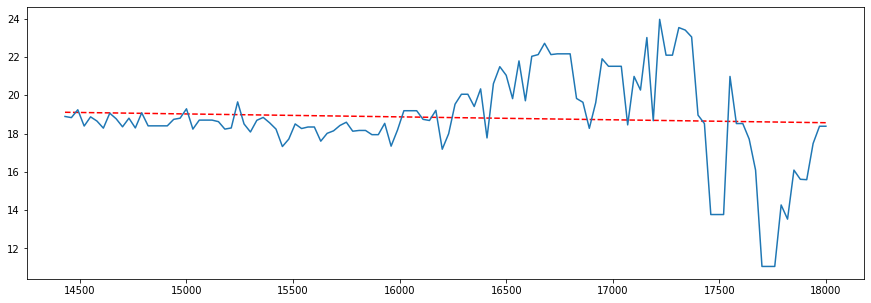

<Figure size 720x720 with 0 Axes>

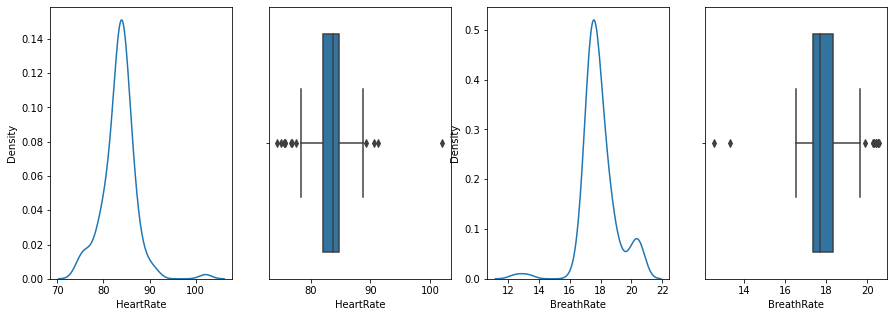

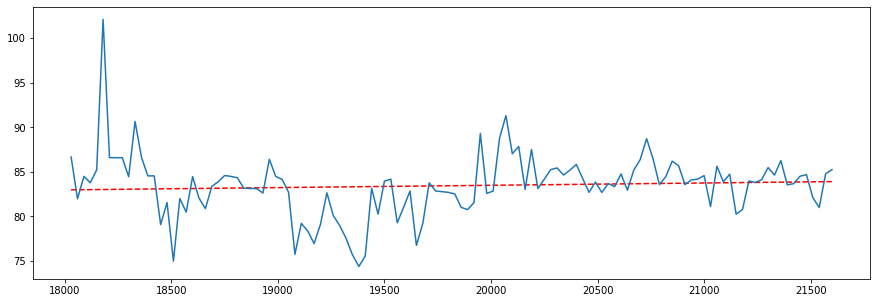

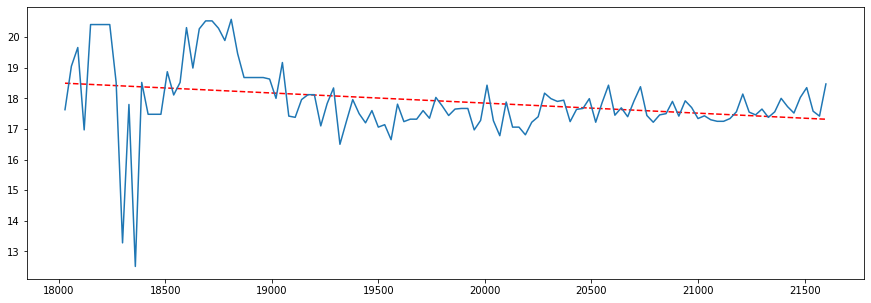

<Figure size 720x720 with 0 Axes>

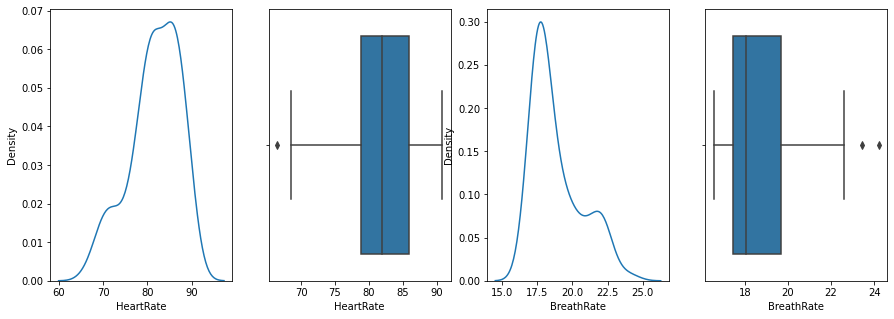

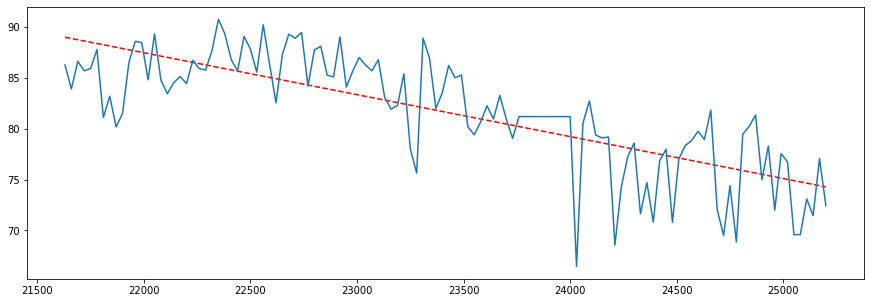

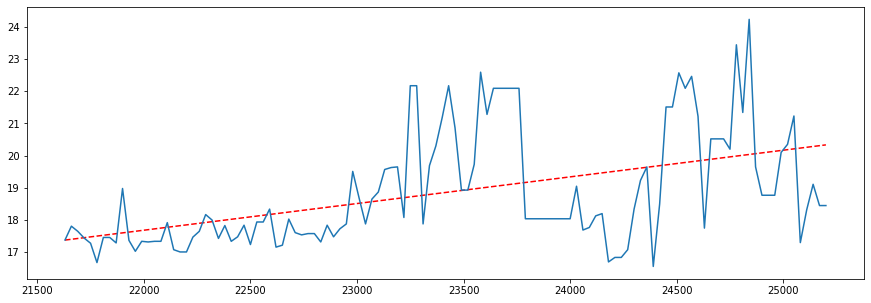

<Figure size 720x720 with 0 Axes>

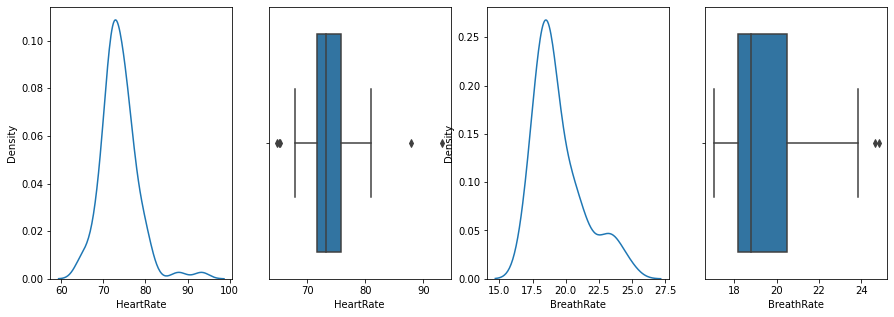

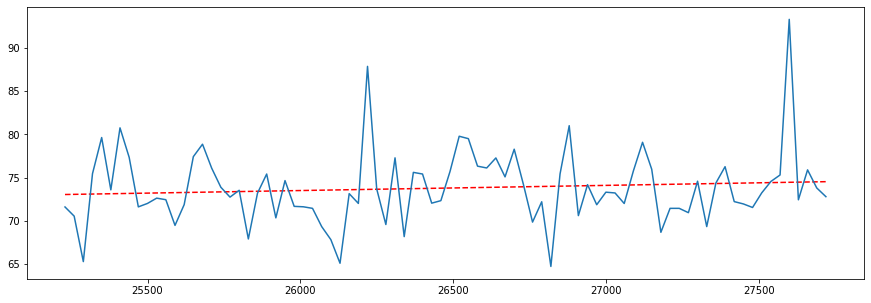

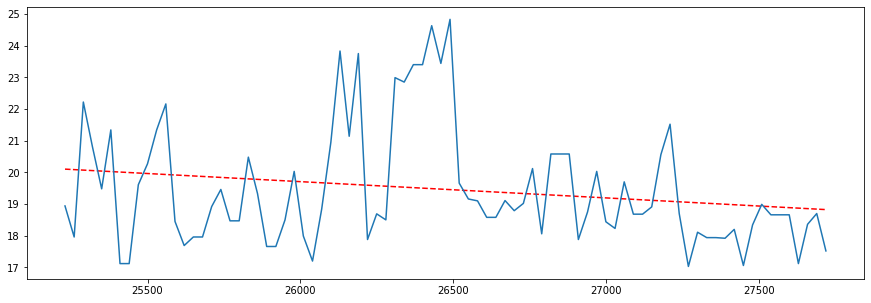

In [2024]:
for i in range(0,len(windows)):
    plt.figure(figsize=(10,10))
    fig, axs = plt.subplots(1,4,figsize=(15,5))   
    sns.kdeplot(windows[i]["HeartRate"],ax=axs[0])  
    sns.boxplot(windows[i]["HeartRate"],ax=axs[1])
    sns.kdeplot(windows[i]["BreathRate"],ax=axs[2])  
    sns.boxplot(windows[i]["BreathRate"],ax=axs[3])
    X = np.array(windows[i]["group"])
    plt.figure(figsize=(15, 5))
    z = np.polyfit(X, windows[i]["HeartRate"], 1)
    p = np.poly1d(z)
    plt.plot(X,p(X),"r--")
    plt.plot(X, windows[i]["HeartRate"])
    plt.show()
    X = np.array(windows[i]["group"])
    plt.figure(figsize=(15, 5))
    z = np.polyfit(X, windows[i]["BreathRate"], 1)
    p = np.poly1d(z)
    plt.plot(X,p(X),"r--")
    plt.plot(X, windows[i]["BreathRate"])
    plt.show()

    

## Note: Same processing is done for all 10 CSV files

### Below Code is used to create the windows and features for each csv

In [2009]:
p = [1,2,3,4,5,6,7,8,9,10]

for j in p:
    df= pd.read_csv("csv_{}.csv".format(j))


    count=0
    def time_conversion(x):
        z = datetime.datetime.utcfromtimestamp(x)
        return z
    def group(x):
        global count
        count+=30
        return count
    df["group"] = df["TimeStamp"].apply(group)
    df["Time"]= df["TimeStamp"].apply(time_conversion)


    z = np.abs(stats.zscore(df["HeartRate"]))
    z1 =np.abs(stats.zscore(df["BreathRate"]))
    drop_index=(np.where(z > 3) or np.where(z<-3))
    drop_index1=(np.where(z1 > 3) or np.where(z1<-3))

    drop_index = list(drop_index)
    drop_index1 = list(drop_index1)
    drop_index = drop_index[0].tolist()
    drop_index1 = drop_index1[0].tolist()

    df.loc[drop_index,"HeartRate"] = df["HeartRate"].median()
    df.loc[drop_index1,"BreathRate"] = df["BreathRate"].median()

    windows=split(df,120)

    for i in range(0,len(windows)):
        windows[i]["Mean_HR"]=windows[i]["HeartRate"].mean()
        windows[i]["Mean_BR"]=windows[i]["BreathRate"].mean()
        windows[i]["Max_HR"]=windows[i]["HeartRate"].max()
        windows[i]["Max_BR"]= windows[i]["BreathRate"].max()
        windows[i]["Min_HR"]=windows[i]["HeartRate"].min()
        windows[i]["Min_BR"]=windows[i]["BreathRate"].min()
        windows[i]["25_HR"]=np.percentile(windows[i]["HeartRate"],25)
        windows[i]["25_BR"]=np.percentile(windows[i]["BreathRate"],25)
        windows[i]["50_HR"]=np.percentile(windows[i]["HeartRate"],50)
        windows[i]["50_BR"]=np.percentile(windows[i]["BreathRate"],50)
        windows[i]["75_HR"]=np.percentile(windows[i]["HeartRate"],75)
        windows[i]["75_BR"]=np.percentile(windows[i]["BreathRate"],75)
        windows[i]["skew_HR"]=windows[i]["HeartRate"].skew()
        windows[i]["skew_BR"]=windows[i]["BreathRate"].skew()
        windows[i]["kurt_HR"]=windows[i]["HeartRate"].kurtosis()
        windows[i]["kurt_BR"]=windows[i]["BreathRate"].kurtosis()
        windows[i]["csv"]=str(p)
        windows[i]["window"]=str(i)


    sleep1 =pd.Series()
    for i in range(0,len(windows)):
        windows[i]= windows[i].iloc[1,5:]
        sleep1= pd.concat([sleep1,windows[i]],axis=1)
    sleep1 = sleep1.iloc[:,1:].T
    sleep1.reset_index(inplace=True)
    sleep1 = sleep1.iloc[:,1:]
    print(j)
    sleep1.to_csv("sleep{}.csv".format(j))


7
